# Bank Customer Clustering

## K-Mode Clustering

### Problem Statement

The data is related with direct marketing campaigns of a Portuguese banking institution.
Cluster customers on the basis of attributes.

Note: This python demonstration is for understanding the use of K-Prototypes clustering algorithm.

### Data
Both Categorical and numerical attributes of Bank Marketing Data Set(UCI Repository: <https://archive.ics.uci.edu/ml/datasets/bank+marketing>) are used for demonstration.

**Attribute Information(Categorical):**

- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone') 
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- UCI Repository: <https://archive.ics.uci.edu/ml/datasets/bank+marketing>

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

## Data Reading and Understading

In [2]:
bank = pd.read_csv('data/bank-additional-full.csv',delimiter=';')

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
# Importing Categorical Columns

In [6]:
bank_cust = bank.copy()

In [7]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
# Converting age into categorical variable.

In [9]:
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank_cust  = bank_cust.drop('age',axis = 1)

In [10]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,149,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,226,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,307,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60


## Data Inspection

In [11]:
bank_cust.shape

(41188, 21)

In [12]:
bank_cust.describe()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   job             41188 non-null  object  
 1   marital         41188 non-null  object  
 2   education       41188 non-null  object  
 3   default         41188 non-null  object  
 4   housing         41188 non-null  object  
 5   loan            41188 non-null  object  
 6   contact         41188 non-null  object  
 7   month           41188 non-null  object  
 8   day_of_week     41188 non-null  object  
 9   duration        41188 non-null  int64   
 10  campaign        41188 non-null  int64   
 11  pdays           41188 non-null  int64   
 12  previous        41188 non-null  int64   
 13  poutcome        41188 non-null  object  
 14  emp.var.rate    41188 non-null  float64 
 15  cons.price.idx  41188 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  euribor3m   

## Data Cleaning

In [14]:
# Checking Null values
bank_cust.isnull().mean()
# There are no NULL values in the dataset, hence it is clean.

job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
age_bin           0.0
dtype: float64

In [15]:
# Data is clean.

### As it is just a demo for K-Prototypes we will skip EDA and jump straight to model building

## Model Building

In [16]:
# First we will keep a copy of data
bank_cust_copy = bank_cust.drop('y',axis=1).copy()

### Data Preparation

In [17]:
bank_cust_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   job             41188 non-null  object  
 1   marital         41188 non-null  object  
 2   education       41188 non-null  object  
 3   default         41188 non-null  object  
 4   housing         41188 non-null  object  
 5   loan            41188 non-null  object  
 6   contact         41188 non-null  object  
 7   month           41188 non-null  object  
 8   day_of_week     41188 non-null  object  
 9   duration        41188 non-null  int64   
 10  campaign        41188 non-null  int64   
 11  pdays           41188 non-null  int64   
 12  previous        41188 non-null  int64   
 13  poutcome        41188 non-null  object  
 14  emp.var.rate    41188 non-null  float64 
 15  cons.price.idx  41188 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  euribor3m   

In [18]:
cat_cols = bank_cust_copy.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = list(set(bank_cust_copy.columns) - set(cat_cols))
cat_cols, num_cols

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'age_bin'],
 ['duration',
  'previous',
  'cons.price.idx',
  'emp.var.rate',
  'cons.conf.idx',
  'pdays',
  'nr.employed',
  'campaign',
  'euribor3m'])

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
std_scaler = preprocessing.StandardScaler()

bank_cust_copy.loc[:, cat_cols] = bank_cust_copy.loc[:, cat_cols].apply(le.fit_transform)

bank_cust_copy.loc[:, num_cols] = std_scaler.fit_transform(bank_cust_copy.loc[:, num_cols])

bank_cust_copy.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_bin
0,3,1,0,0,0,0,1,6,1,0.010471,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,4
1,7,1,3,1,0,0,1,6,1,-0.421501,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,4
2,7,1,3,0,2,0,1,6,1,-0.124520,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,2
3,0,1,1,0,0,0,1,6,1,-0.413787,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,2
4,7,1,3,0,0,2,1,6,1,0.187888,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,4


In [20]:
# Importing Libraries

from kmodes.kprototypes import KPrototypes

## Using K-Protypes

In [22]:
[bank_cust_copy.columns.get_loc(c) for c in cat_cols]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 13, 19]

In [23]:
kpro_cluster = KPrototypes(n_clusters=2, n_init = 1, verbose=1, n_jobs=-1)
kpro_cluster_pred = kpro_cluster.fit_predict(bank_cust_copy, \
                                             categorical=[bank_cust_copy.columns.get_loc(c) for c in cat_cols] )

Initialization method and algorithm are deterministic. Setting n_init to 1.


In [24]:
# Predicted Clusters
kpro_cluster_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=uint16)

In [25]:
clusterCentroidsDf = pd.DataFrame(kpro_cluster.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust_copy.columns

In [26]:
# Mode of the clusters
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_bin
0,0.046598,-0.171844,-0.399069,0.609555,-1.346433,-0.945665,-0.461066,-1.409433,-1.310891,0.0,1.0,6.0,0.0,2.0,0.0,0.0,6.0,1.0,1.0,2.0
1,-0.022818,0.084148,0.195414,-0.298483,0.659314,0.463068,0.225772,0.690163,0.641910,0.0,1.0,6.0,0.0,2.0,0.0,0.0,6.0,4.0,1.0,2.0


## Choosing K by comparing Cost against each K

In [69]:
cost = []
for num_clusters in list(range(1,15)):
    kpro = KPrototypes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1, n_jobs=-1)
    kpro.fit_predict(bank_cust_copy, \
                      categorical = [bank_cust_copy.columns.get_loc(c) for c in cat_cols])
    cost.append(kpro.cost_)
    print('\n-----')

Initialization method and algorithm are deterministic. Setting n_init to 1.

-----
Initialization method and algorithm are deterministic. Setting n_init to 1.

-----
Initialization method and algorithm are deterministic. Setting n_init to 1.

-----
Initialization method and algorithm are deterministic. Setting n_init to 1.

-----
Initialization method and algorithm are deterministic. Setting n_init to 1.

-----
Initialization method and algorithm are deterministic. Setting n_init to 1.

-----
Initialization method and algorithm are deterministic. Setting n_init to 1.

-----
Initialization method and algorithm are deterministic. Setting n_init to 1.

-----
Initialization method and algorithm are deterministic. Setting n_init to 1.

-----
Initialization method and algorithm are deterministic. Setting n_init to 1.

-----
Initialization method and algorithm are deterministic. Setting n_init to 1.

-----
Initialization method and algorithm are deterministic. Setting n_init to 1.

-----
Init

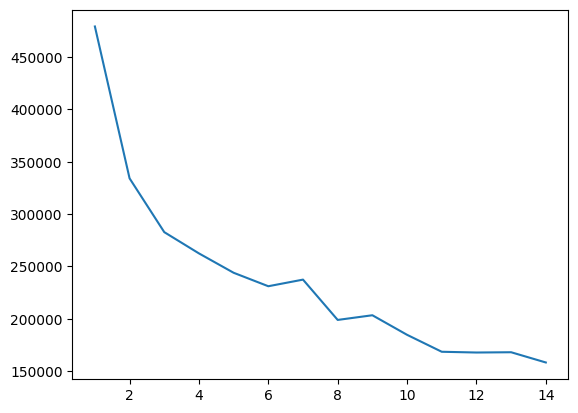

In [70]:
y = np.array([i for i in range(1,15)])
plt.plot(y,cost)

In [71]:
## Choosing K=8

In [27]:
kpro_cluster = KPrototypes(n_clusters=8, init = "Cao", n_init = 1, verbose=1)
kpro_cluster_pred = kpro_cluster.fit_predict(bank_cust_copy, \
                      categorical = [bank_cust_copy.columns.get_loc(c) for c in cat_cols] )

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 18318, ncost: 241436.12474676865
Run: 1, iteration: 2/100, moves: 5134, ncost: 209662.0204574094
Run: 1, iteration: 3/100, moves: 1148, ncost: 208319.72486972652
Run: 1, iteration: 4/100, moves: 648, ncost: 207798.37192721054
Run: 1, iteration: 5/100, moves: 661, ncost: 206486.7851759603
Run: 1, iteration: 6/100, moves: 312, ncost: 206026.49846153357
Run: 1, iteration: 7/100, moves: 62, ncost: 206022.82780076886
Run: 1, iteration: 8/100, moves: 28, ncost: 206021.88601531024
Run: 1, iteration: 9/100, moves: 12, ncost: 206021.7827970781
Run: 1, iteration: 10/100, moves: 2, ncost: 206021.7798821338
Run: 1, iteration: 11/100, moves: 0, ncost: 206021.7798821338


In [75]:
kpro_cluster_pred

array([5, 5, 5, ..., 0, 2, 0], dtype=uint16)

### Combining the predicted clusters with the original DF.

In [31]:
clustersDf = pd.DataFrame(kpro_cluster_pred)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index'], axis = 1)

In [32]:
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin,cluster_predicted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60,1
1,services,married,high.school,unknown,no,no,telephone,may,mon,149,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60,1
2,services,married,high.school,no,yes,no,telephone,may,mon,226,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30-40,1
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,30-40,1
4,services,married,high.school,no,no,yes,telephone,may,mon,307,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60,1


### Cluster Identification

In [33]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [36]:
cluster_0

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin,cluster_predicted
37,technician,married,basic.9y,no,yes,no,telephone,may,mon,1666,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60,0
57,services,married,high.school,unknown,yes,no,telephone,may,mon,787,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40-50,0
61,blue-collar,married,basic.9y,no,yes,no,telephone,may,mon,812,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-60,0
75,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,40-50,0
83,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,40-50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39914,admin.,single,university.degree,no,yes,yes,cellular,jun,wed,1407,...,0,nonexistent,-1.7,94.055,-39.8,0.739,4991.6,yes,30-40,0
40513,retired,single,high.school,no,no,no,cellular,aug,mon,2035,...,0,nonexistent,-1.7,94.027,-38.3,0.896,4991.6,yes,40-50,0
40537,admin.,single,high.school,no,no,no,telephone,aug,fri,3785,...,0,nonexistent,-1.7,94.027,-38.3,0.888,4991.6,no,20-30,0
40730,retired,married,high.school,no,no,no,cellular,sep,wed,1640,...,0,nonexistent,-1.1,94.199,-37.5,0.876,4963.6,yes,50-60,0


In [83]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8651 entries, 27680 to 41187
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                8651 non-null   object  
 1   marital            8651 non-null   object  
 2   education          8651 non-null   object  
 3   default            8651 non-null   object  
 4   housing            8651 non-null   object  
 5   loan               8651 non-null   object  
 6   contact            8651 non-null   object  
 7   month              8651 non-null   object  
 8   day_of_week        8651 non-null   object  
 9   duration           8651 non-null   int64   
 10  campaign           8651 non-null   int64   
 11  pdays              8651 non-null   int64   
 12  previous           8651 non-null   int64   
 13  poutcome           8651 non-null   object  
 14  emp.var.rate       8651 non-null   float64 
 15  cons.price.idx     8651 non-null   float64 
 16  c

In [84]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 24108 to 41182
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                1539 non-null   object  
 1   marital            1539 non-null   object  
 2   education          1539 non-null   object  
 3   default            1539 non-null   object  
 4   housing            1539 non-null   object  
 5   loan               1539 non-null   object  
 6   contact            1539 non-null   object  
 7   month              1539 non-null   object  
 8   day_of_week        1539 non-null   object  
 9   duration           1539 non-null   int64   
 10  campaign           1539 non-null   int64   
 11  pdays              1539 non-null   int64   
 12  previous           1539 non-null   int64   
 13  poutcome           1539 non-null   object  
 14  emp.var.rate       1539 non-null   float64 
 15  cons.price.idx     1539 non-null   float64 
 16  c

In [85]:
# Job

In [34]:

x2plot = combinedDf[combinedDf.cluster_predicted==0]

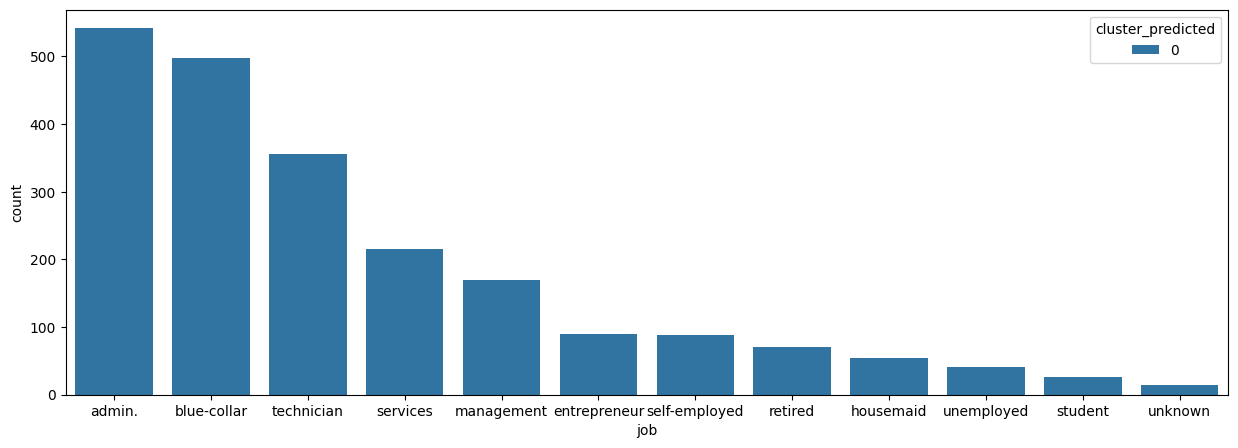

In [35]:
plt.subplots(figsize = (15,5))
sns.countplot(x=x2plot['job'],order=x2plot['job'].value_counts().index,hue=x2plot['cluster_predicted'])
plt.show()

In [87]:
# Marital

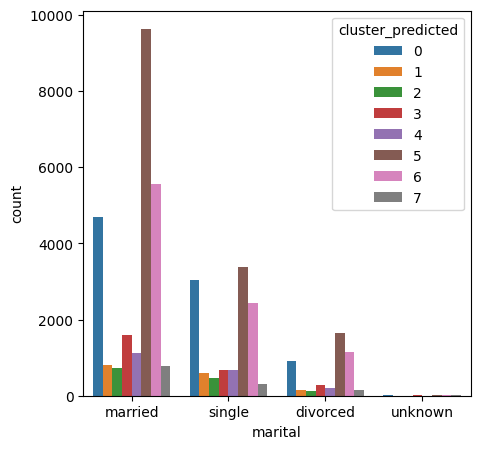

In [88]:
plt.subplots(figsize = (5,5))
sns.countplot(x=combinedDf['marital'],order=combinedDf['marital'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [89]:
# Education

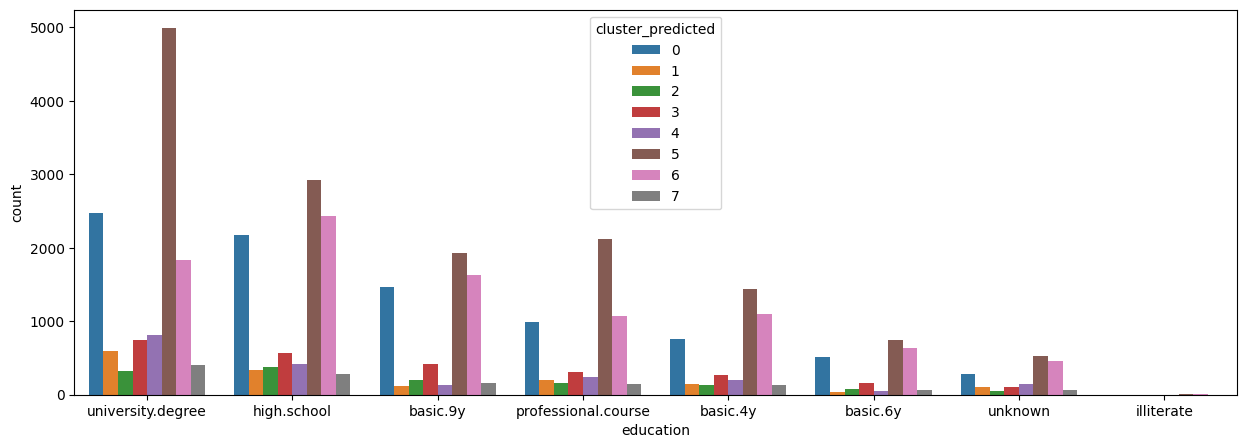

In [90]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['education'],order=combinedDf['education'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [91]:
# Default

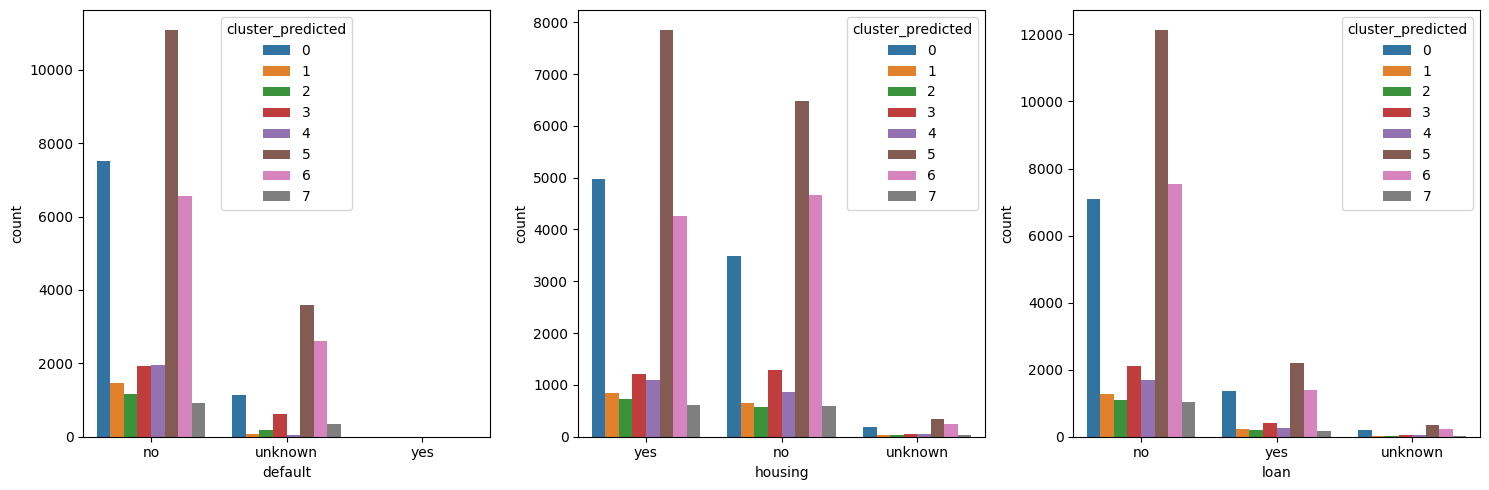

In [92]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['default'],order=combinedDf['default'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['housing'],order=combinedDf['housing'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['loan'],order=combinedDf['loan'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()

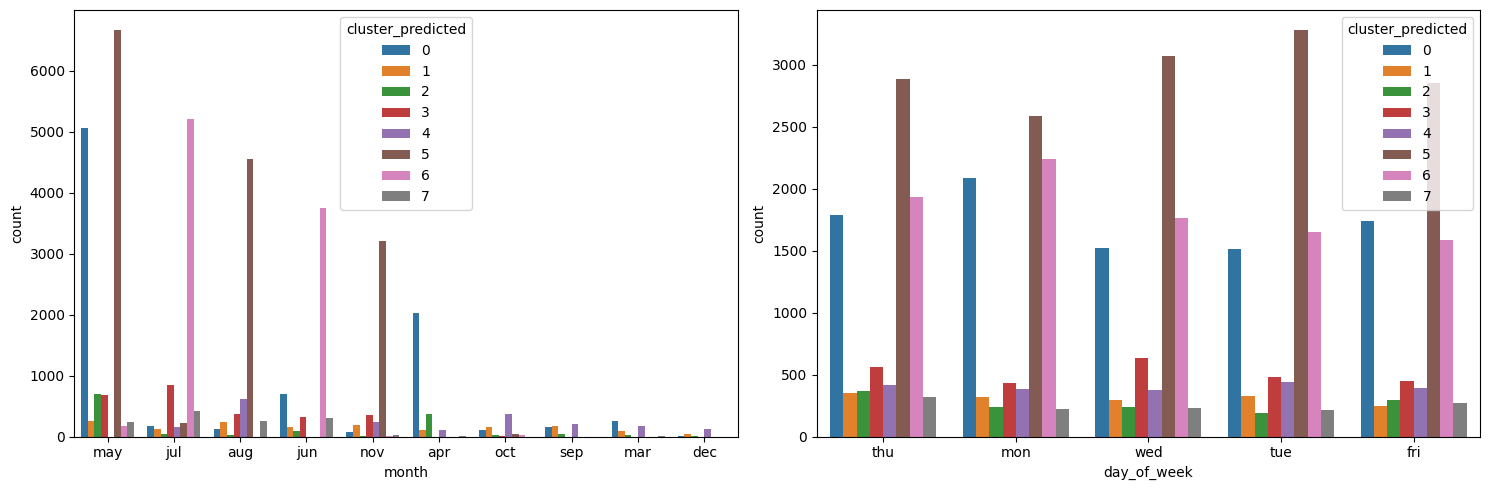

In [93]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['month'],order=combinedDf['month'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['day_of_week'],order=combinedDf['day_of_week'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

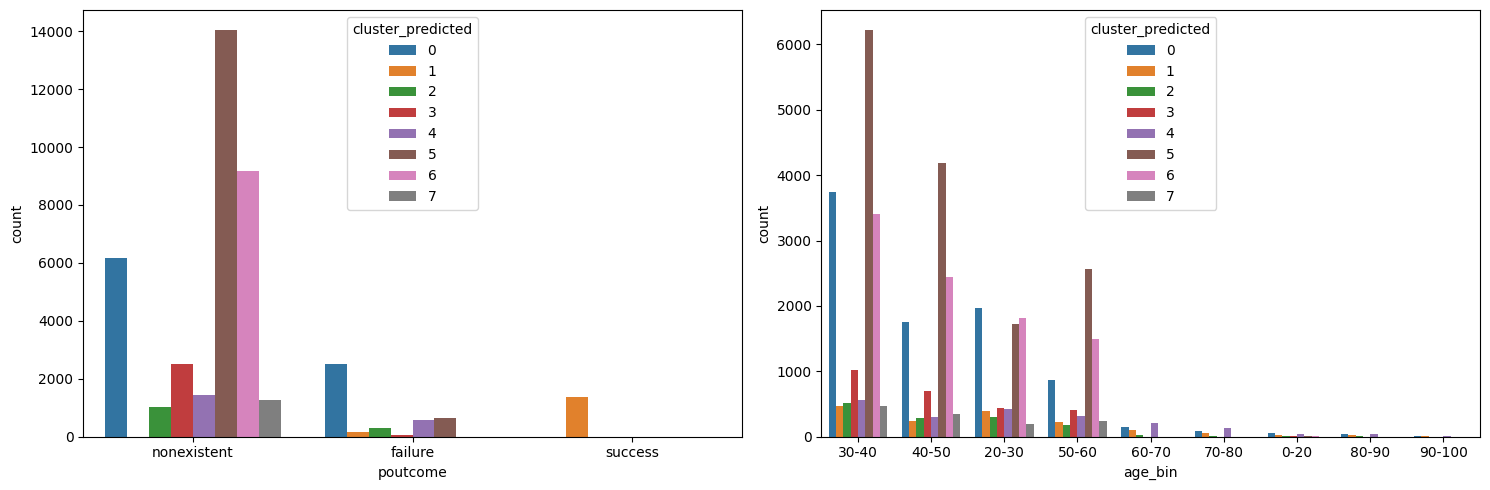

In [94]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['poutcome'],order=combinedDf['poutcome'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['age_bin'],order=combinedDf['age_bin'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

In [95]:
# Above visualization can help in identification of clusters.

In [96]:
combinedDf['y'] = bank['y']

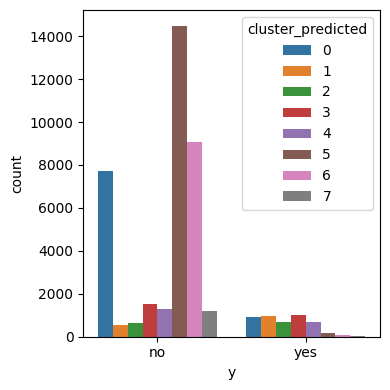

In [97]:
f, axs = plt.subplots(1,1,figsize = (4,4))
sns.countplot(x=combinedDf['y'],order=combinedDf['y'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs)

plt.tight_layout()
plt.show()